In [3]:
import numpy as np
import xarray as xr
import geoutils.preprocessing.interpolate as interp
import geoutils.preprocessing.open_nc_file as of
import geoutils.plotting.plots as cplt
from importlib import reload

data_folder = '/home/strnad/Nextcloud/tmp/'
data_file1 = f'{data_folder}/lai_3xCO2_CESM.nc'
data_file2 = f'{data_folder}/lai_3xCO2_COSMOS.nc'


In [7]:
reload(interp)
reload(of)
data1 = xr.open_dataset(data_file1)
data1_of = of.open_nc_file(data_file1, lon_2_180=True)

method = 'nearest'
grid_step = 1
data1_nearest = interp.interpolate_grid(dataarray=data1_of,
                                        method=method,
                                        grid_step=grid_step)
data1_linear = interp.interpolate_grid(dataarray=data1_of,
                                       method='linear',
                                       grid_step=grid_step)

Start processing data!
Chunk the data
Rename:Lon : lon
['lon', 'Lat', 'year']
Rename:Lat : lat
['lon', 'lat', 'year']
Shift longitude -180 - 180!
Sorted longitudes and latitudes in ascending order!
End processing data! Dimensions: ['lat', 'year', 'lon']
WARNING! Set max lon from 177.5 to 179.75!
Interpolte grid from -180.0 to 179.0,-90.0 to 80.0!
WARNING! Set max lon from 177.5 to 179.75!
Interpolte grid from -180.0 to 179.0,-90.0 to 80.0!


/home/strnad/climnet/geoutils/geoutils/utils/spatial_utils.py:1136: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  dims = dict(ds.dims)
/home/strnad/climnet/geoutils/geoutils/preprocessing/open_nc_file.py:86: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  dims = list(ds.dims.keys())
/home/strnad/climnet/geoutils/geoutils/utils/spatial_utils.py:1136: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.


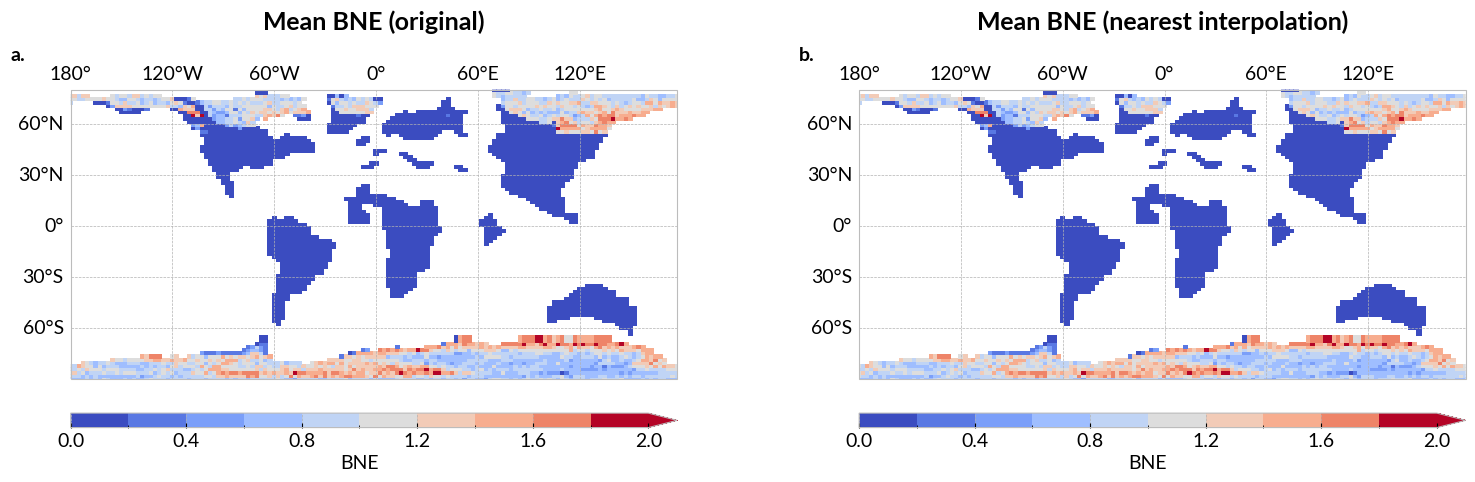

In [8]:
label_lai = 'BNE'

mean_BNE_nearest = data1_nearest[label_lai].mean(dim='year')
mean_BNE_linear = data1_linear[label_lai].mean(dim='year')
mean_BNE_orig = data1_of[label_lai].mean(dim='year')

vmin_bne = 0
vmax_bne = 2

im = cplt.create_multi_plot(nrows=1, ncols=2, figsize=(18, 5),
                            projection='PlateCarree', wspace=0.3,)

cplt.plot_map(mean_BNE_orig.T,
                   ax=im['ax'][0],
                   title=f'Mean BNE (original)',
                   plot_type='colormesh',
                   cmap='coolwarm',
                   levels=10,
                   label=label_lai,
                   vmin=vmin_bne, vmax=vmax_bne,
                   tick_step=2,
                   extend='max',
                   orientation='horizontal',
                   set_map=False,
                   )

im2 = cplt.plot_map(mean_BNE_linear.T,
                   ax=im['ax'][1],
                   title=f'Mean BNE (nearest interpolation)',
                   plot_type='colormesh',
                   cmap='coolwarm',
                   levels=10,
                   label=label_lai,
                   vmin=vmin_bne, vmax=vmax_bne,
                   tick_step=2,
                   extend='max',
                   orientation='horizontal',
                   set_map=False,
                   )

# im2 = cplt.plot_map(mean_BNE_linear.T,
#                    ax=im['ax'][2],
#                    title=f'Mean BNE (linear interpolation)',
#                    plot_type='colormesh',
#                    cmap='Paired',
#                    levels=10,
#                    label=label_lai,
#                    vmin=vmin_bne, vmax=vmax_bne,
#                    tick_step=2,
#                    extend='max',
#                    orientation='horizontal',
#                    set_map=False,
#                    )

In [25]:
mean_BNE

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 171)
Coordinates:
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 77.0 78.0 79.0 80.0
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0
Data variables: (12/18)
    BNE      (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>
    BINE     (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>
    BNS      (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>
    TeNE     (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>
    TeBS     (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>
    IBS      (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>
    ...       ...
    TeSSh    (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>
    TrESh    (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>
    TrRSh    (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>
    BESh     (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>
    BSSh     (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>
    Total    (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>